In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# import own modules
sys.path.append("..")  # Adds higher directory to python modules path.
from scripts import features as ft

In [2]:
# load data
df = ft.get_features()

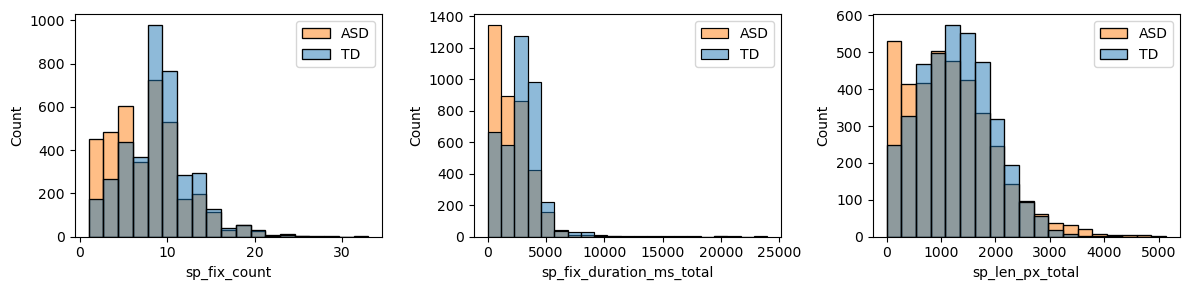

In [43]:
# plot very basic histograms
plt.figure(figsize=(12,3))
for i, c in enumerate(['sp_fix_count', "sp_fix_duration_ms_total", "sp_len_px_total"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df,
                 x=c,
                 hue='asd',
                 bins='doane')
    plt.legend(['ASD', 'TD'])

plt.tight_layout()

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      3837
           1       0.70      0.24      0.36      3761

    accuracy                           0.57      7598
   macro avg       0.62      0.57      0.52      7598
weighted avg       0.62      0.57      0.52      7598



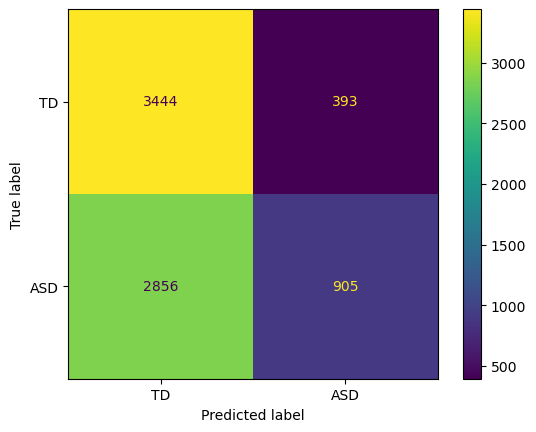

In [53]:
baseline_idx = df[
    (df["sp_fix_count"] < 7)
    & (df["sp_fix_duration_ms_total"] < 2500)
    & (df["sp_len_px_total"] < 600)
].index

# create prediction pd.series
baseline_pred = pd.Series(np.zeros((df.shape[0],)), index=df.index)
baseline_pred[baseline_idx] = 1.0

ConfusionMatrixDisplay(
    confusion_matrix(df["asd"], baseline_pred), display_labels=["TD", "ASD"]
).plot()
print(classification_report(df['asd'], baseline_pred))

In [4]:
import pygwalker as pyg

In [5]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-000614b4f4417f5fI6JTXieFHO7jBawx" style="height: auto">\n    <head>…